## Global Power Plant Database Project

### Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_data_source (text): attribution for the reported generation information
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

#### Output/Target Feature(Make two prediction):
-  Primary Fuel 
-  capacity_mw 

In [5]:
## Importing Necessary Libaries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
## Importing the Dataset
df = pd.read_csv('Power_plant')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(907, 27)

- There seems to be 907 rows and 27 columns in the Dataset.

- After observing the values in the capacity_mw column we can see that there is Continuous Data and hence prediction will become a Regression Problem.
- Similary for prediction of primary_fuel columns we will need Classification model.             

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- There ar lot of Categorical and Numerical Features in the Dataset.
- There are also lots of NULL Values present in the Dataset which needs to be Filled

In [15]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [17]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
features_with_na

['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

- The above Columns seem to have NULL VAlues
- We will see based on the Number of NULL Values whether to fill them or drop them

In [18]:
## To print the percentage of NULL values in each feature

null_counts = df.isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

print(null_percentages)

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [19]:
null_percentages[null_percentages > 50]

other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
owner                        62.293275
wepp_id                     100.000000
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source       50.496141
estimated_generation_gwh    100.000000
dtype: float64

The following features have more than 50% of the missing data and hence need to be removed

- other_fuel1
- other_fuel2
- other_fuel3
- owner
- wepp_id
- generation_gwh_2013
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_gwh_2018         
- generation_gwh_2019
- generation_data_source
- estimated_generation_gwh

In [20]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018","generation_gwh_2019",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [21]:
df.shape

(907, 13)

- We are left with 13 features after Data cleaning a bit.

In [22]:
## To check for any Duplicate values
df.duplicated().any()

False

In [23]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

- There seem to be no Duplicate Values, white spaces in the Dataset

### Exploratory Data Analysis (EDA)

In [24]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


- The Features 'country','country_long','year_of_capacity_data' have only 1 type of value and also missing data therefore it can be dropped.
- The feature 'name', 'gppd_idnr' have 907 unique values and hence we donot need them and therefore thay will be dopped.
- The feature 'url' is also not needed because it is simply a link and doesnot provide any use for prediction.

In [25]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)

In [26]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [27]:
df.shape

(907, 7)

- For our New dataset we can see we have 7 features left.

In [28]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


- We have 4 numerical features and 3 Categorical features

Seperating the Categorical and Numerical features for further Analysis

In [31]:
Numericals_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [32]:
Numericals_features

['capacity_mw', 'latitude', 'longitude', 'commissioning_year']

In [33]:
Categorical_features

['primary_fuel', 'source', 'geolocation_source']

#### Handling the missing values

- We will fill the missing values in the Numerical features with mean and in case of Categorical data we will fill the missing values with mode.

In [34]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [35]:
df.isna().any()

capacity_mw           False
latitude              False
longitude             False
primary_fuel          False
commissioning_year    False
source                False
geolocation_source    False
dtype: bool

- The Dataset does not have any more NULL values and we can proceed

### Visualization

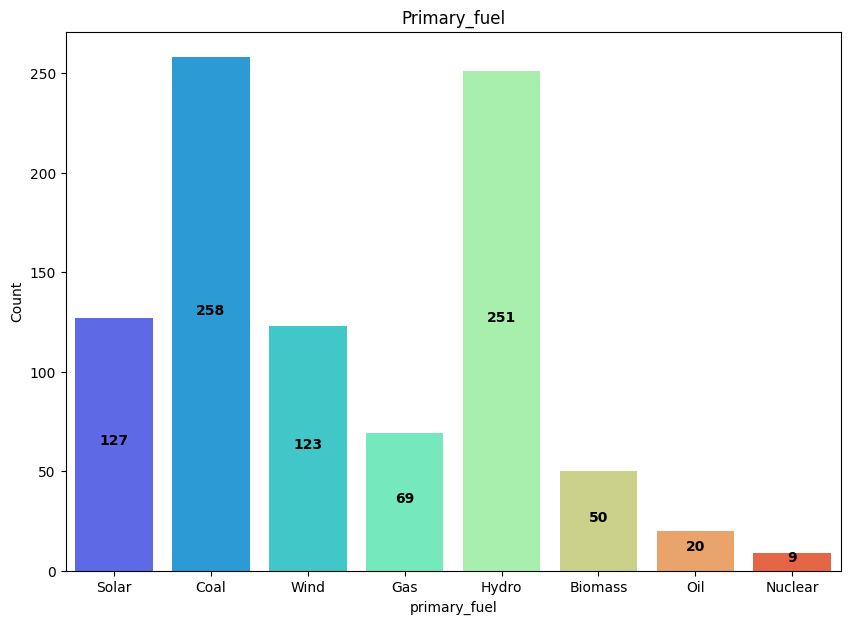

In [40]:
plt.figure(figsize=(10,7))
col_name = 'primary_fuel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="rainbow")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold')
    index += 1

plt.title('Primary_fuel')
plt.ylabel('Count')
plt.show()

- The highest number of data is for Coal and Hydro followed by Solar and Wind.

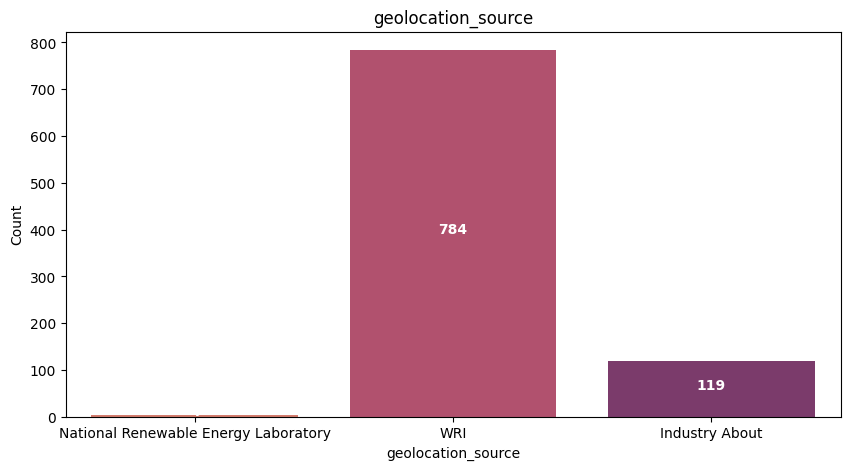

In [43]:
plt.figure(figsize=(10,5))
col_name = 'geolocation_source'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title('geolocation_source')
plt.ylabel('Count')
plt.show()

- Highest number is for WRI and least is for National Renewable Energy Lab.

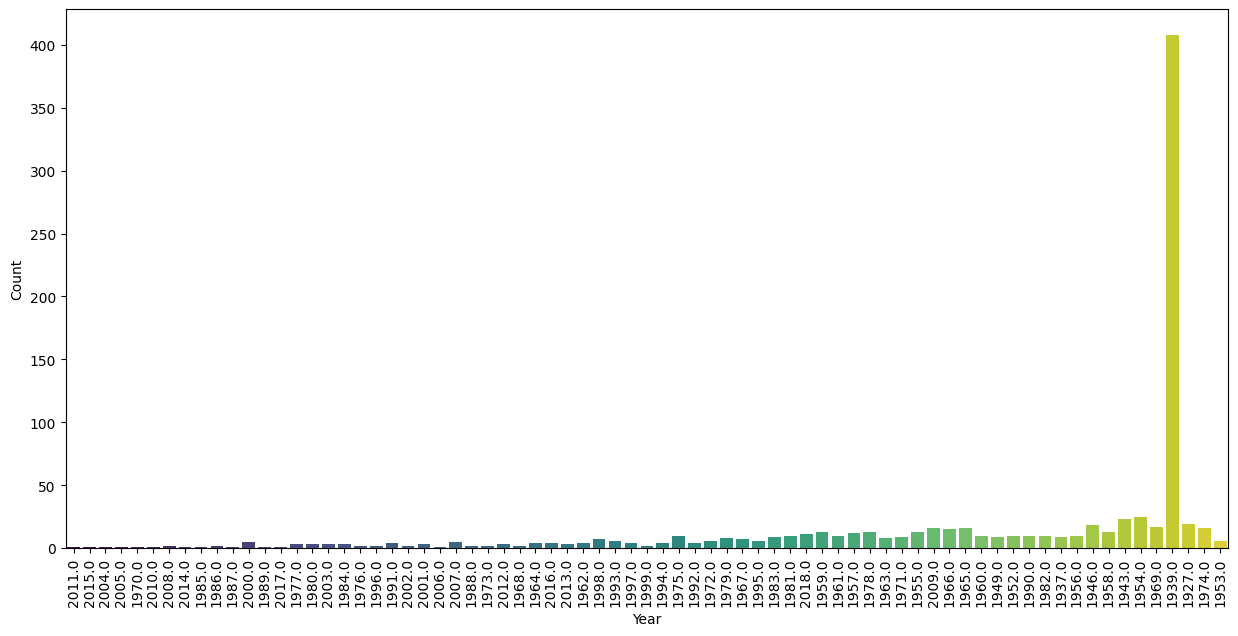

In [47]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
plot = sns.countplot(df["commissioning_year"], palette="viridis")
plot.set_xticklabels(labels=values, rotation=90)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

- 1939 covered the most number of Data points

Scatter plot

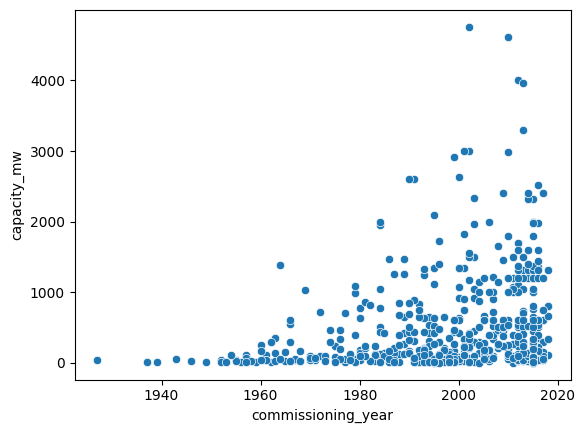

In [48]:
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

- The Generation of Energy is highest for 2000 to 2020.

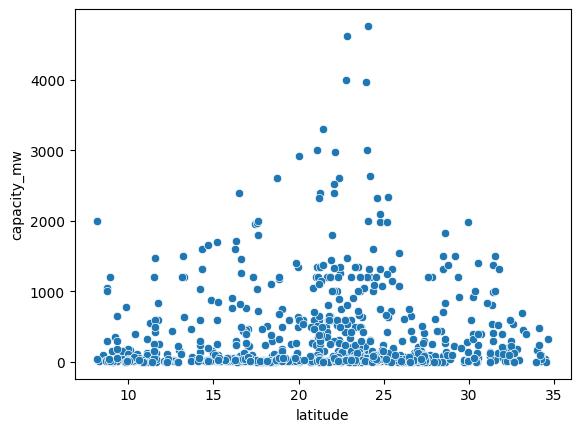

In [49]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

- The highest measurement of Electricity is between 20 to 25

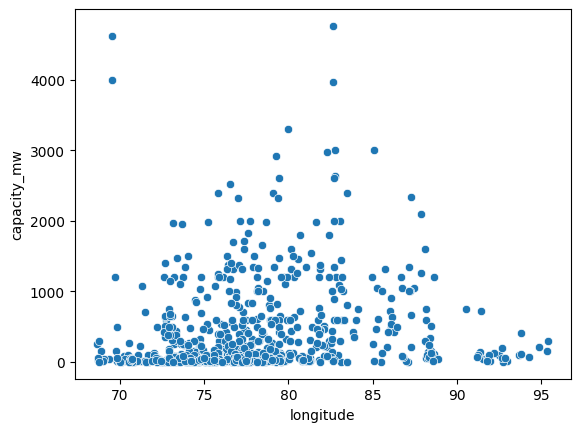

In [50]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

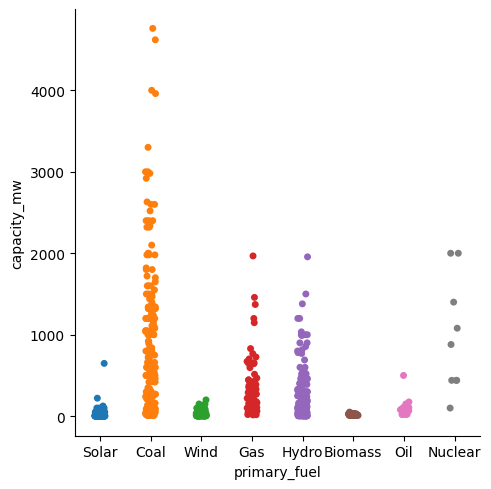

In [51]:
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

- The highest energy produced is done by using coal followed by Gas and Hydrobuissness

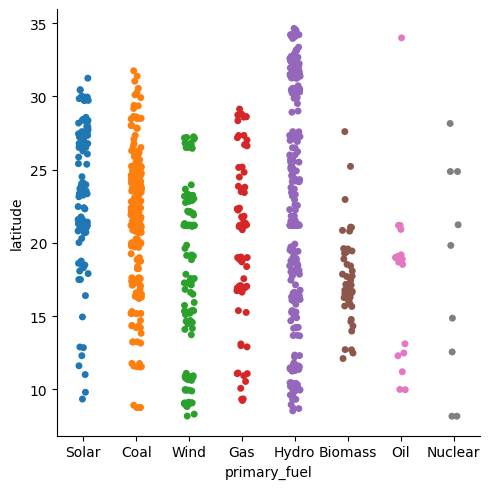

In [53]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()


- Hydro is used accross the latitude the highest because of the presence of Oceans across the earth is far higher

### Outlier Detection

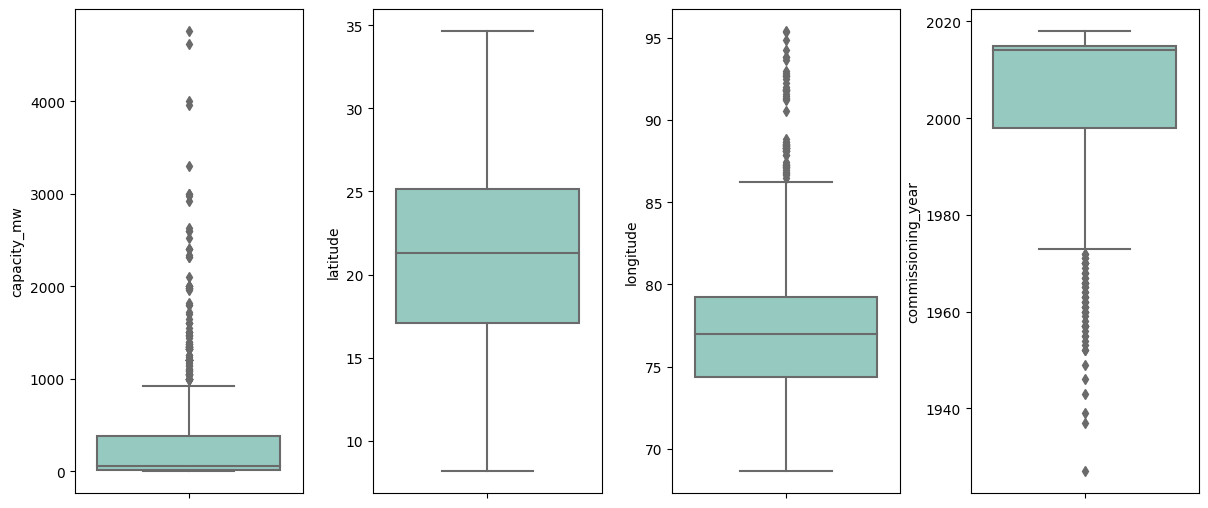

In [60]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set3")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- The features longitude and commsion_year have Outliers which needs to be treated

#### Distribution Plot

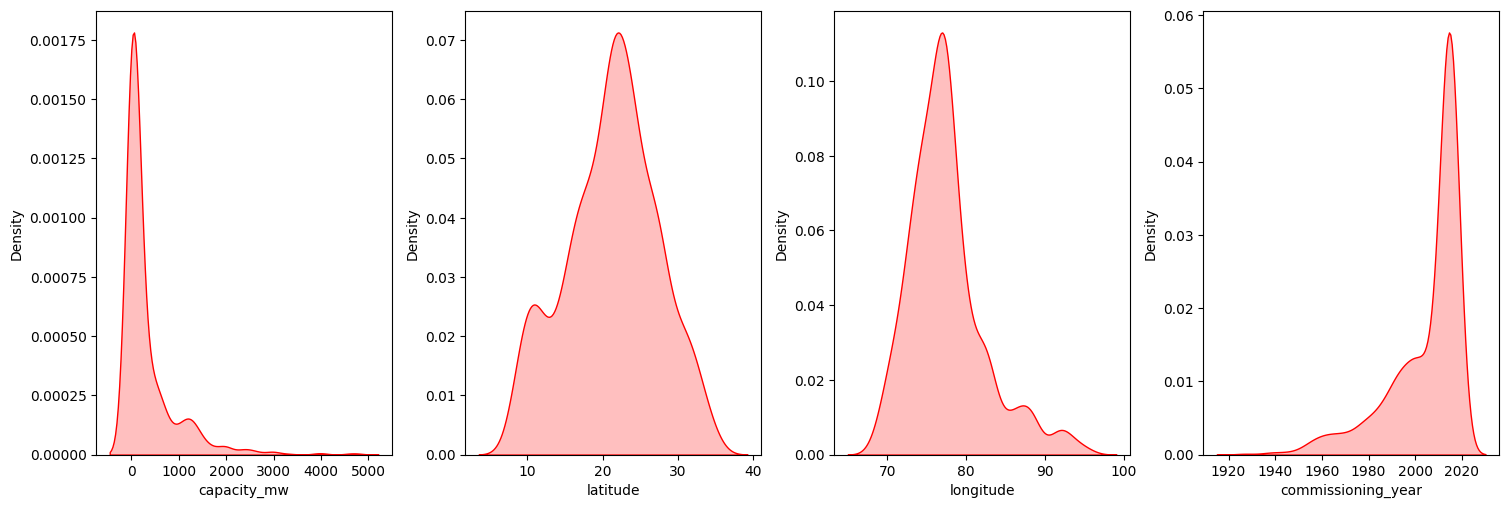

In [62]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- There seems to be skewness present in the Numerical Columns which needs to be treated

##### Pairplot

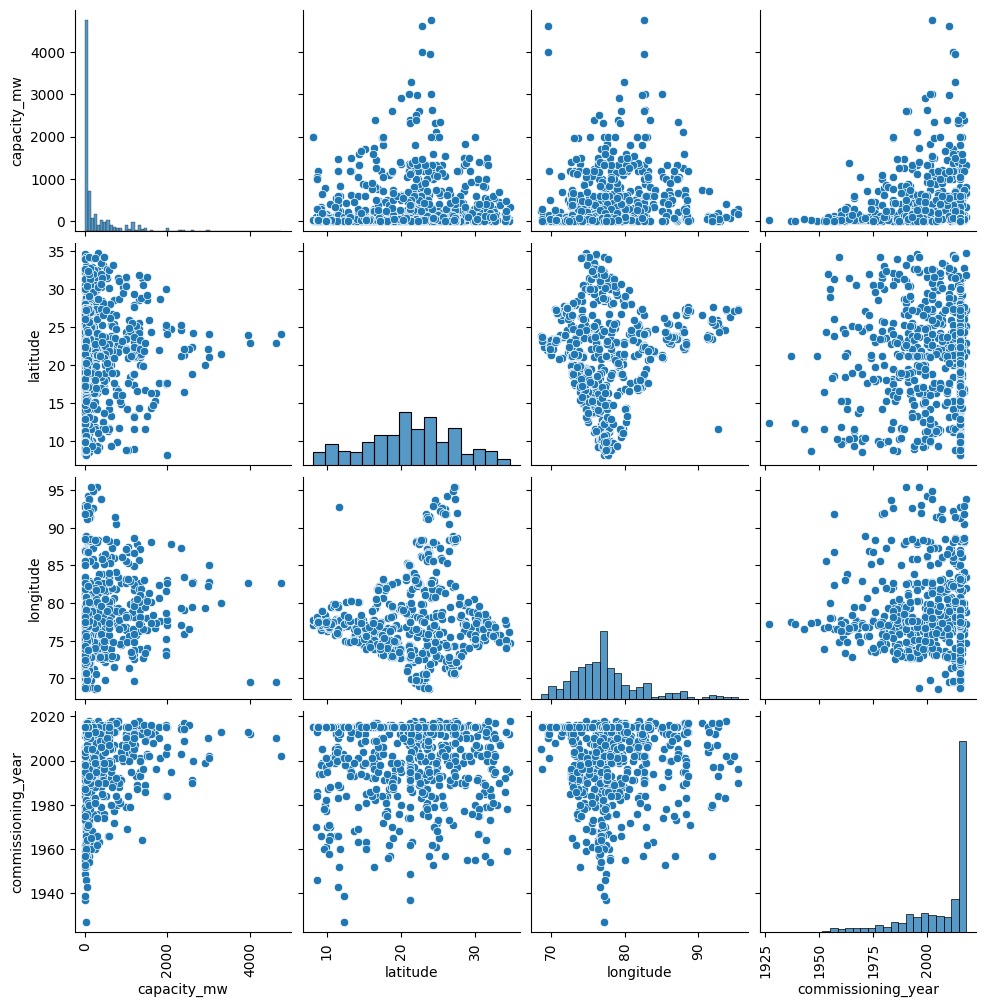

In [63]:
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

- We can Analyse the Data Distribution from the above Pairplot.

### Encoding the Categorical Features

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [65]:
label = LabelEncoder()
df["primary_fuel"] = label.fit_transform(df["primary_fuel"])

In [66]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [67]:
Encoder = OrdinalEncoder()
df['geolocation_source'] = Encoder.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = Encoder.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


- All the categorical features are now converted to Int type

### Correlation

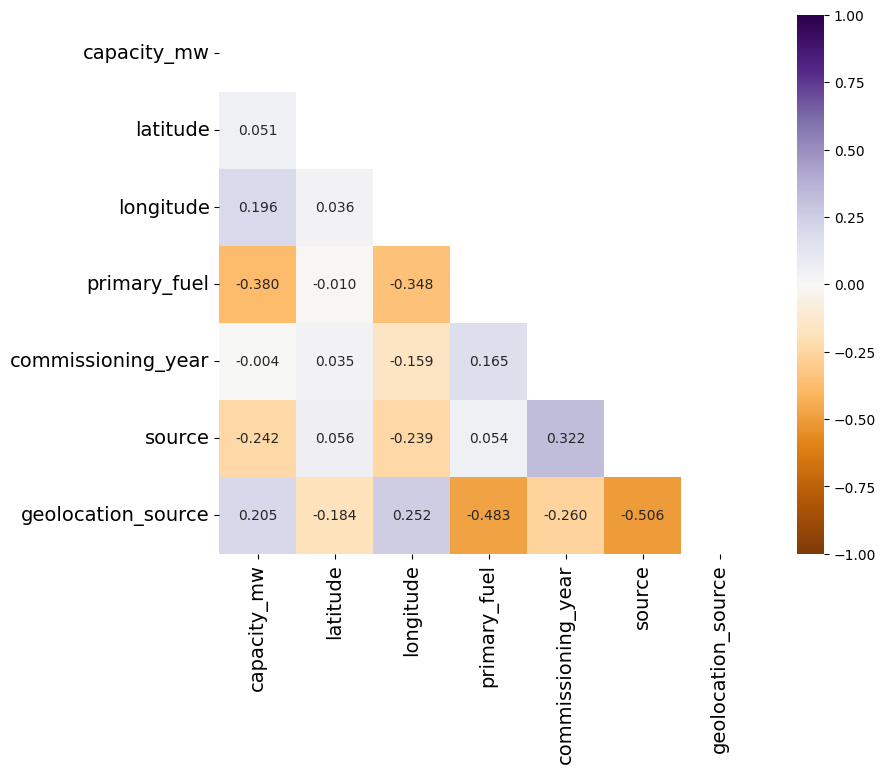

In [69]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="PuOr", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- There is almost no muticollinearity in the current Dataset
- The output featues have both positive and Negative correlation between them

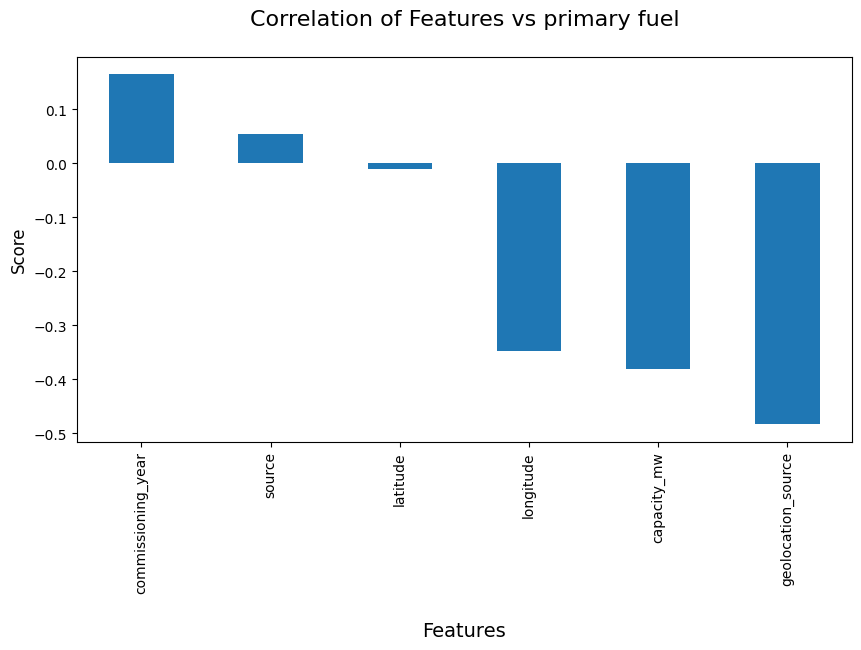

In [70]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs primary fuel\n", fontsize=16)
plt.xlabel("\nFeatures", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.show()

- The features 'commisioning_year' and 'source' have positive correlation with Target 'primary_fuel'
- The reaming features are negtaviely correlated

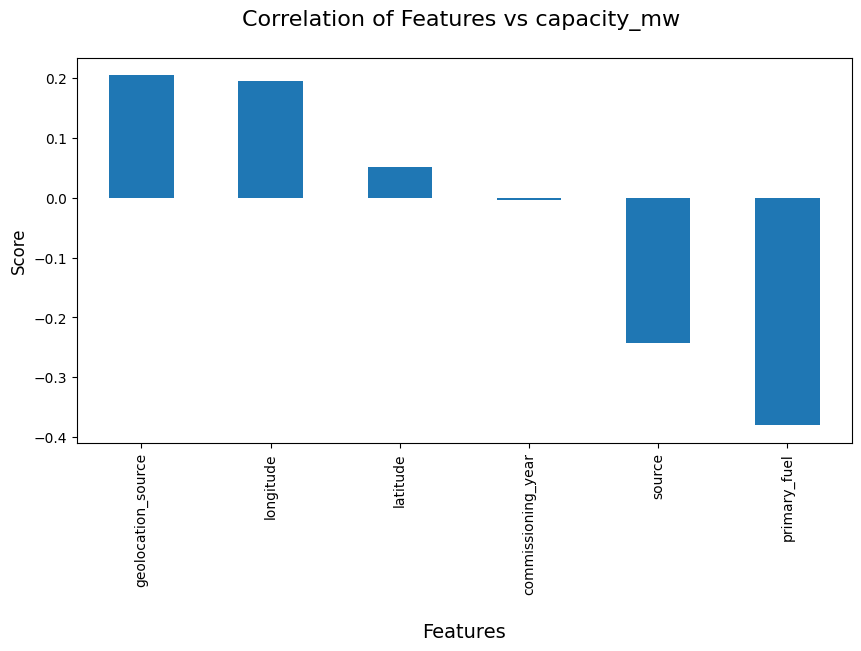

In [72]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs capacity_mw \n", fontsize=16)
plt.xlabel("\nFeatures", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.show()

- The features 'geolocation_source', 'longitude' and 'latitude' are positively Correlated with the Target label 'capacity_mw'
- The remaining features are negatively correlated

### Handling Outliers

In [73]:
from scipy.stats import zscore
## Lets assume the Threshold to be where data points which have higher Z-score than 3 will be treated as Outliers
threshold = 3
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

## Calculating the Paramters to get the idea about the Data Loss
print ("Dataframe shape before removing outliers: ", df.shape)
print ("Dataframe shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe shape before removing outliers:  (907, 7)
Dataframe shape after removing outliers:  (838, 7)
Percentage of data loss after outlier removal:  7.6074972436604185


- The Data loss after removing Oultiers is 7.6% which is acceptable.

In [74]:
df=df_new.copy()

#### Handling Skewnss

In [75]:
df.skew()

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

- Using log transformation to rempve skewness.

In [77]:
for col in Numericals_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

#### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [79]:
X = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [80]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,1.252763,28.1839,4.307313,2011.0,109.0,1.0
1,4.595120,24.7663,4.325575,2015.0,174.0,2.0
2,3.693867,21.9038,4.253813,2015.0,21.0,2.0
3,4.912655,23.8712,4.525696,2004.0,22.0,2.0
4,7.496097,21.9603,4.423757,2015.0,22.0,2.0


In [81]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [82]:
y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

- We can see that the Dataset is Highly Imbalanced so we will use oversampling to Balance it

In [83]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [84]:
y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

- The Dataset is perfectly Balanced

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.726396,1.445854,-0.864673,0.398220,1.372398,-1.194099
1,0.158271,0.856474,-0.467590,0.726239,2.824426,0.368423
2,-0.349922,0.362824,-2.027910,0.726239,-0.593425,0.368423
3,0.337321,0.702110,3.883583,-0.175813,-0.571086,0.368423
4,1.794056,0.372567,1.667157,0.726239,-0.571086,0.368423


## Prediction for Classification Model

In [86]:
## Importing Neccessary Libraries for classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Importing Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Train Test Split and Finding the best random state for the models

In [88]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 73.71794871794873 for Random State 403


- Best Random state seems to be 403

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=403)

### Classification model

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'primary_fuel'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [90]:
def Fuel(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=86)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [92]:
model = LogisticRegression()
Fuel(model, X, y)

Accuracy Score: 66.88034188034187

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        54
           1       0.52      0.53      0.52        59
           2       0.76      0.25      0.38        63
           3       0.53      0.47      0.50        64
           4       0.59      0.83      0.69        58
           5       0.49      0.51      0.50        55
           6       1.00      1.00      1.00        53
           7       0.84      1.00      0.91        62

    accuracy                           0.67       468
   macro avg       0.68      0.68      0.66       468
weighted avg       0.68      0.67      0.65       468

Cross Validation Score: 67.57490196078432

Accuracy Score - Cross Validation Score is 0.37381598793363935


#### Support Vector Classifier

In [93]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=129)
Fuel(model, X, y)

Accuracy Score: 76.70940170940172

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84        54
           1       0.53      0.56      0.55        59
           2       0.83      0.46      0.59        63
           3       0.87      0.61      0.72        64
           4       0.65      1.00      0.79        58
           5       0.71      0.76      0.74        55
           6       1.00      0.96      0.98        53
           7       0.85      0.98      0.91        62

    accuracy                           0.77       468
   macro avg       0.78      0.77      0.76       468
weighted avg       0.78      0.77      0.76       468

Cross Validation Score: 79.38067736185384

Accuracy Score - Cross Validation Score is -11.431959413135885


#### Decision Tree Classifier

In [94]:
model = DecisionTreeClassifier()
Fuel(model, X, y)

Accuracy Score: 83.33333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        54
           1       0.68      0.54      0.60        59
           2       0.76      0.67      0.71        63
           3       0.69      0.75      0.72        64
           4       0.89      0.93      0.91        58
           5       0.81      0.87      0.84        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        62

    accuracy                           0.83       468
   macro avg       0.83      0.84      0.83       468
weighted avg       0.83      0.83      0.83       468

Cross Validation Score: 85.20442067736185

Accuracy Score - Cross Validation Score is -17.255702728643897


#### Random Forest Classifier

In [95]:
model = RandomForestClassifier(random_state=129)
Fuel(model, X, y)

Accuracy Score: 86.53846153846155

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        54
           1       0.72      0.58      0.64        59
           2       0.83      0.76      0.79        63
           3       0.81      0.78      0.79        64
           4       0.84      0.98      0.90        58
           5       0.86      0.87      0.86        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        62

    accuracy                           0.87       468
   macro avg       0.86      0.87      0.86       468
weighted avg       0.86      0.87      0.86       468

Cross Validation Score: 90.59893048128342

Accuracy Score - Cross Validation Score is -22.65021253256546


#### K Neighbors Classifier

In [96]:
model=KNeighborsClassifier(n_neighbors=5)
Fuel(model, X, y)

Accuracy Score: 80.98290598290599

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85        54
           1       0.74      0.47      0.58        59
           2       0.70      0.59      0.64        63
           3       0.86      0.67      0.75        64
           4       0.71      1.00      0.83        58
           5       0.79      0.91      0.85        55
           6       0.96      1.00      0.98        53
           7       0.94      0.97      0.95        62

    accuracy                           0.81       468
   macro avg       0.81      0.82      0.80       468
weighted avg       0.81      0.81      0.80       468

Cross Validation Score: 84.93575757575756

Accuracy Score - Cross Validation Score is -16.987039627039607


#### Extra Trees Classifier

In [97]:
model=ExtraTreesClassifier()
Fuel(model, X, y)

Accuracy Score: 88.67521367521367

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       0.86      0.61      0.71        59
           2       0.83      0.79      0.81        63
           3       0.86      0.80      0.83        64
           4       0.81      1.00      0.89        58
           5       0.89      0.93      0.91        55
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        62

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.88       468

Cross Validation Score: 91.5592156862745

Accuracy Score - Cross Validation Score is -23.610497737556543


- The Best Model According to the Data is RandomForest Classifer

### Hyperparameter tuning the Best Model

In [98]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [99]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

- I used Random Search CV to narrow down a particular group where i can get best possible score

In [100]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'gini'}

In [101]:
best_random_grid = rf_randomcv.best_estimator_

In [103]:
from sklearn.metrics import confusion_matrix

y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[55  2  0  0  0  0  0  0]
 [ 3 34  4  2  3  0  0  0]
 [ 0  2 31  0  1  5  0  0]
 [ 0  3  1 24  2  1  0  0]
 [ 0  0  1  0 49  0  0  0]
 [ 1  0  0  1  1 35  0  0]
 [ 0  0  0  0  0  0 54  0]
 [ 0  0  0  0  0  0  0 60]]
Accuracy Score 0.912
Classification report:               precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.83      0.74      0.78        46
           2       0.84      0.79      0.82        39
           3       0.89      0.77      0.83        31
           4       0.88      0.98      0.92        50
           5       0.85      0.92      0.89        38
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        60

    accuracy                           0.91       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.91      0.91      0.91       375



- Using these parameters in GridSearch CV

In [104]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [230], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [105]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [230],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [106]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 230,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1300}

In [107]:
grid_search.best_score_

0.9004653243847877

In [109]:
Final_Model = RandomForestClassifier(n_estimators=1300,criterion="gini", max_depth=230,min_samples_leaf=1 ,min_samples_split=3, n_jobs=1, random_state=42)
Classifier = Final_Model.fit(X_train, y_train)
y_pred = Final_Model.predict(X_test)
accuracy = (accuracy_score(y_test, y_pred))*100
print("Accuracy score for the Best Model is:", accuracy)

Accuracy score for the Best Model is: 90.4


### AUC ROC score

In [112]:
from sklearn.metrics import roc_auc_score

# predict the probabilities of each class
y_prob = Final_Model.predict_proba(X_test)

# calculate the AUC score for each class
auc_scores = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("AUC scores: ", auc_scores)

AUC scores:  0.9918692548814325


- The AUC score is 0.99 which is very high

### Confusion Matrix

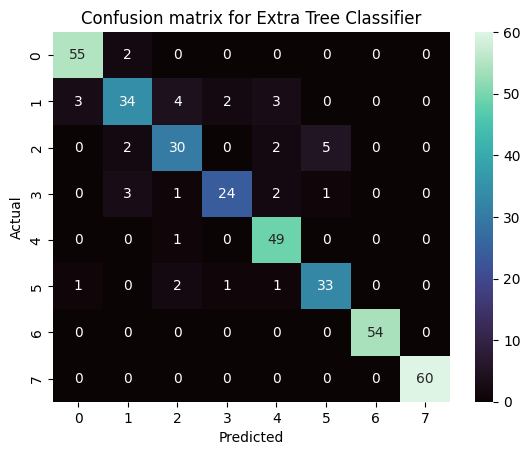

In [113]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Looking at the confusion matrix the Model seems to be working well
- We are able to Determine how many times the model predicted accurately.

### Saving the Classification Model

In [114]:
import joblib
filename = "PowerPlant_Classification.pkl"
joblib.dump(Final_Model, filename)

['PowerPlant_Classification.pkl']

## Model Building for Regression Problem

In [115]:
X = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

### Feature Scaling

In [116]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.155327,-0.905807,1.174653,0.384586,1.578700,-1.059632
1,0.598448,-0.567933,-0.986874,0.671188,3.125148,0.400848
2,0.132019,-1.895590,1.606958,0.671188,-0.514953,0.400848
3,0.452596,3.134428,-0.554568,-0.116966,-0.491161,0.400848
4,0.141226,1.248497,-0.986874,0.671188,-0.491161,0.400848


### Train test split and Best Random State

- Before we proceed to model building we need to find the best random state for better accuracy
- we will use Linear Regression Algorithm to get the best random state
- We will use the metrics r2_score to get the accuracy of the model

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5635312151547311 on Random State 170


- The Best Random state is 170

#### Model Building

In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=170)

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'capacity_mw'
- The function will caluclate the RMSE score , r2_score , calculates the Cross-Validation score and in the end it will Calculate the Difference between the r2_score and Cross-Validation score.

In [123]:
def Capacity(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)
    
    # Model Training
    model.fit(X_train, y_train)
    
    # Predicting Value using X_test
    y_pred = model.predict(X_test)
    
    # Calucalting the RMSE Score (The Lower the score the Better)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # Calcualting the R2_score
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Calculating the Cross Validation Score (The value of cv will be 5)
    Cross_Val_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", Cross_Val_score)
    
    # Difference between the r2 score and Cross_vaL_score
    result = r2 - Cross_Val_score
    print("R2 Score - Cross Validation Score is", result)

#### Linear Regression

In [124]:
model=LinearRegression()
Capacity(model, X, y)

RMSE Score is: 1.4629917900944125
R2 Score is: 33.57682718913
Cross Validation Score: 41.938343174865324
R2 Score - Cross Validation Score is -8.361515985735323


#### Ridge Regression

In [125]:
model=Ridge()
Capacity(model, X, y)

RMSE Score is: 1.4627450078375175
R2 Score is: 33.59923425672133
Cross Validation Score: 41.94278744538152
R2 Score - Cross Validation Score is -8.343553188660188


#### Lasso Regression

In [126]:
model=Lasso()
Capacity(model, X, y)

RMSE Score is: 1.7853797607315833
R2 Score is: 1.0770513655969483
Cross Validation Score: -0.27438937492980653
R2 Score - Cross Validation Score is 1.3514407405267548


#### Support Vector Machine (SVR)

In [127]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
Capacity(model, X, y)

RMSE Score is: 1.3477991842043289
R2 Score is: 43.625043874768195
Cross Validation Score: 48.73928224288554
R2 Score - Cross Validation Score is -5.114238368117341


#### Decsion Tree Regressor

In [128]:
model = DecisionTreeRegressor(criterion="poisson")
Capacity(model, X, y)

RMSE Score is: 1.4262740801313407
R2 Score is: 36.86912363370241
Cross Validation Score: 36.66127466145752
R2 Score - Cross Validation Score is 0.2078489722448893


#### Random Forest Regressor

In [129]:
model = RandomForestRegressor(max_depth=2, max_features="sqrt")
Capacity(model, X, y)

RMSE Score is: 1.3224654899295916
R2 Score is: 45.724412363106936
Cross Validation Score: 46.00592019150416
R2 Score - Cross Validation Score is -0.2815078283972241


#### K Neighbours Regressor

In [130]:
model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
Capacity(model, X, y)

RMSE Score is: 1.3333521928835734
R2 Score is: 44.82712723434227
Cross Validation Score: 48.17788922229589
R2 Score - Cross Validation Score is -3.350761987953618


#### AdaBoost Regressor

In [134]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
Capacity(model, X, y)

RMSE Score is: 1.23063144509581
R2 Score is: 53.00064969302145
Cross Validation Score: 54.91379554379362
R2 Score - Cross Validation Score is -1.9131458507721675


#### Extra-Tree Regressor

In [131]:
model = ExtraTreesRegressor()
Capacity(model, X, y)

RMSE Score is: 1.1260529631839713
R2 Score is: 60.64920832647876
Cross Validation Score: 62.30671624602036
R2 Score - Cross Validation Score is -1.657507919541601


#### - The Best Model is Extra-Tree Regressor 

### Hyperparameter Tuning

In [138]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}


In [139]:
rf_randomcv=RandomizedSearchCV(estimator=ExtraTreesRegressor(),param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [140]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 230,
 'criterion': 'poisson'}

In [141]:
best_random_grid = rf_randomcv.best_estimator_

In [142]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['poisson'], 'max_depth': [230], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [143]:
rf=ExtraTreesRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['poisson'], 'max_depth': [230],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [144]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 230,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 1600}

In [146]:
Final_Model = ExtraTreesRegressor(criterion='poisson',max_depth=230,max_features='auto',min_samples_split=8,min_samples_leaf=2, n_estimators=1600, n_jobs=-1, random_state=42)
Regressor = Final_Model.fit(X_train, y_train)
final_pred = Final_Model.predict(X_test)
final_r2_score = r2_score(y_test, final_pred)*100
print("R2 score for the Final Model :", final_r2_score)

R2 score for the Final Model : 74.44237226982857


### Saving the Model

In [147]:
filename = "PowerPlant_Regression.pkl"
joblib.dump(Final_Model, filename)

['PowerPlant_Regression.pkl']